In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Text(0.5, 0, 'fico')

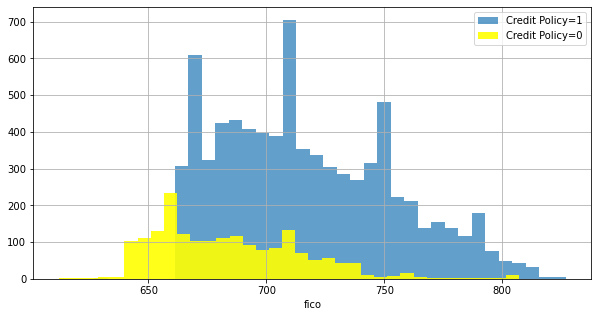

In [4]:
plt.figure(figsize=(10,5))
df[df['credit.policy']==1]['fico'].hist(bins=35,label='Credit Policy=1',alpha=0.7)
df[df['credit.policy']==0]['fico'].hist(bins=35,label='Credit Policy=0',alpha=0.9,color='yellow')
plt.legend()
plt.xlabel('fico')

C:\Users\CVU5R0CA3\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\CVU5R0CA3\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


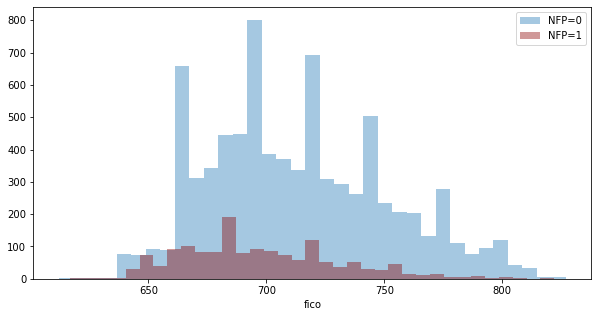

In [5]:
plt.figure(figsize=(10,5))
sns.distplot(df[df['not.fully.paid']==0]['fico'],kde=False,bins=35,label='NFP=0')
sns.distplot(df[df['not.fully.paid']==1]['fico'],kde=False,bins=35,label='NFP=1',color='darkred')
plt.legend()

<AxesSubplot:xlabel='purpose', ylabel='count'>

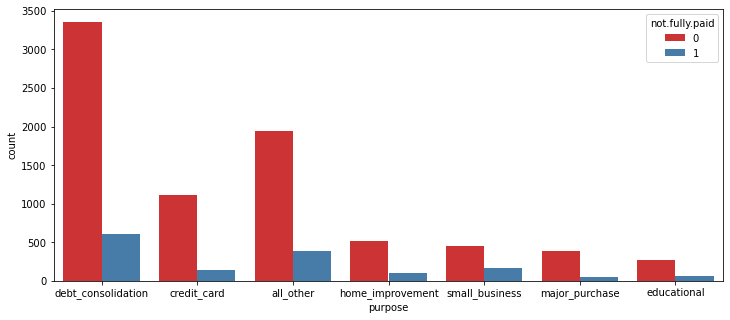

In [6]:
plt.figure(figsize=(12,5))
sns.countplot(x='purpose',data=df,hue='not.fully.paid',palette='Set1')

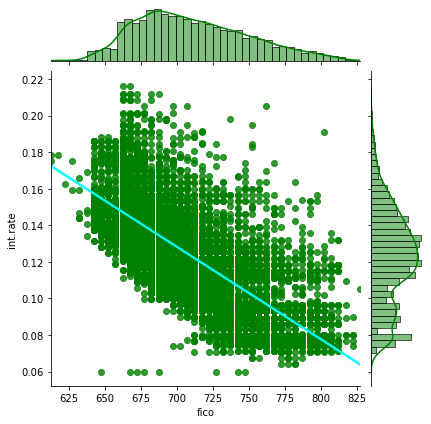

In [13]:
sns.jointplot(x='fico',y='int.rate',data=df,kind='reg',color='green',
              joint_kws={'line_kws':{'color':'cyan'}})

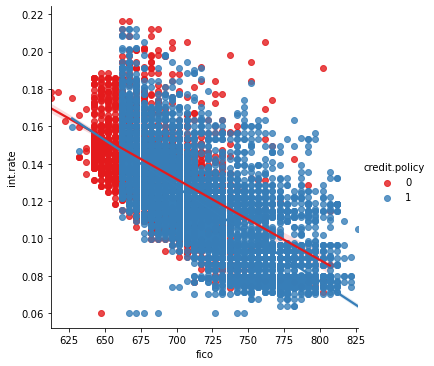

In [15]:
sns.lmplot(x='fico',y='int.rate',data=df,hue='credit.policy',palette='Set1')

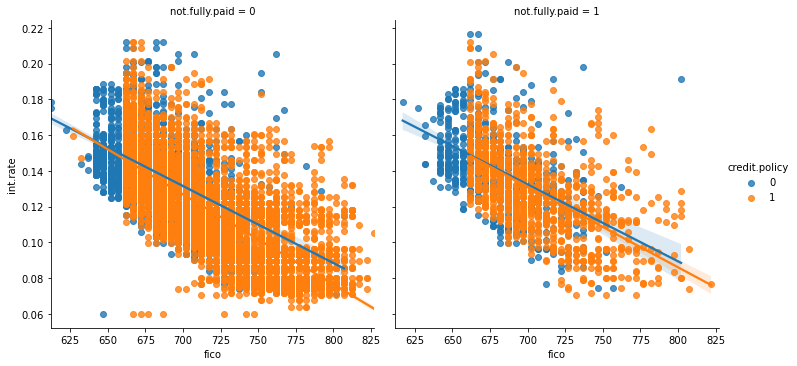

In [17]:
sns.lmplot(x='fico',y='int.rate',data=df,hue='credit.policy',col='not.fully.paid')

In [21]:
df_final=pd.get_dummies(df,columns=['purpose'],drop_first=True)
df_final.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_final.drop('not.fully.paid',axis=1),
                                                    df_final['not.fully.paid'],
                                                    test_size=0.3)

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
prediction1=dtree.predict(X_test)
print('\n')
print('Decision Tree Analysis:')
print('\n')
print(classification_report(y_test,prediction1))
print('\n')
print(confusion_matrix(y_test,prediction1))



Decision Tree Analysis:


              precision    recall  f1-score   support

           0       0.85      0.84      0.85      2422
           1       0.22      0.23      0.23       452

    accuracy                           0.75      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.75      0.75      0.75      2874



[[2046  376]
 [ 347  105]]


In [36]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
prediction2=rf.predict(X_test)
print('\n')
print('Random Forest Analysis:')
print('\n')
print(classification_report(y_test,prediction2))
print('\n')
print(confusion_matrix(y_test,prediction2))



Random Forest Analysis:


              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2422
           1       0.41      0.02      0.05       452

    accuracy                           0.84      2874
   macro avg       0.63      0.51      0.48      2874
weighted avg       0.78      0.84      0.78      2874



[[2406   16]
 [ 441   11]]
